In [4]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

import statsmodels.api as sm 
import sklearn as sk

from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumSquareRoundR.ttf']
plt.rcParams['font.size']=12
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 전체 데이터를 로드

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



In [6]:
fish_data = [[l,w]for l,w in zip(fish_length,fish_weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [7]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 전체 데이터 35개 훈련데이터로 14개를 테스트세트로 분리

In [8]:
#훈련세트
tarin_input = fish_data[0:35]
train_target = fish_target[0:35]
#테스트세트
test_input = fish_data[35:]
test_target = fish_target[35:]

In [9]:
print(test_input)
print(len(test_input))

[[9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
14


In [10]:
print(train_target)
print(test_target)


#잘못된 세트

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### k-최근접이웃 알고리즘 모델

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [12]:
kn.fit(X=tarin_input, y=train_target)
kn.score(X=test_input,y=test_target) # 정확도 0

0.0

#### 정확도가 0일때

In [13]:
#도미로 예상되는 값으로 예측
kn.predict(X=[[30,600]])

array([1])

In [14]:
#빙어로 예상되는ㄴ 생선으로 예측
kn.predict(X=[[10.0,8.7]])

array([1])

In [15]:
#이상한데이터
kn.predict(X=[[1300.0,2000.0]])

array([1])

#### numpy 배열화 / 데이터확인

In [16]:
input_arr = np.array(fish_data)
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [17]:
target_arr = np.array(fish_target)
target_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [18]:
input_arr.shape

(49, 2)

In [19]:
target_arr.shape

(49,)

In [20]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index  #49개 데이터를 도미와 빙어를 랜덤하게 섞기 위한 작업

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [21]:
train_input = input_arr[index[0:35]]
train_target = target_arr[index[0:35]]

In [22]:
train_input

array([[  32. ,  340. ],
       [  12.4,   13.4],
       [  14.3,   19.7],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  36. ,  714. ],
       [  35. ,  720. ],
       [  35. ,  725. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  31.5,  500. ],
       [  29. ,  430. ],
       [  41. ,  950. ],
       [  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ]])

In [23]:
train_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [24]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [25]:
test_input

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

In [26]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#### numpy섞은 훈련세트와 테스트세트 확인

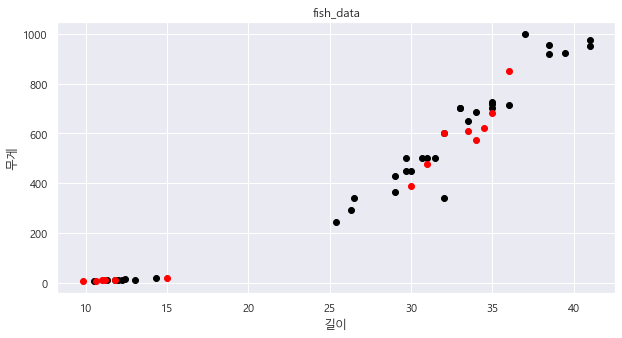

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0],y=train_input[:,1],color='black')
plt.scatter(x=test_input[:,0],y=test_input[:,1],color='red')
plt.title('fish_data')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

### ML 2

In [28]:
kn.fit(X=train_input,y=train_target)

KNeighborsClassifier()

In [29]:
# 정확도 체크
kn.score(X=test_input,y=test_target)

1.0

In [30]:
# 예측
kn.predict(X=test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [31]:
test_target
# 실제테스트타겟과 예측값 완전 일치

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

####  책에는 없는 내용

In [32]:
#1_3 새로운 생선예측에 나왔던 데이터로 다시예측
pred_input = np.array([[30,600]])
pred_input

array([[ 30, 600]])

In [33]:
kn.predict(X=pred_input)
pred_input
#도미

array([[ 30, 600]])

In [34]:
kn.predict(X=pred_input)
#빙어

array([1])

#### 정리
실제 데이터(100)중에서 70~80을 훈련세트, 20~30은 테스트세트로 사용.
실제 데이터가 10만개 이하면 훈련이 제대로 이루어지지 않을 수 있음
실무에서는 적어도 3년이상의 데이터를 수집한 뒤 훈련/테스트/검증 진행한다.

In [36]:
kn.predict(X=[[25.0,15.0]])
#도미값을 입력했는데 빙어로 예측

array([0])